A MLP basedclassifier that uses stylometric features and Automl based hybrid model.
Feature importance is also calculated below that.

In [ ]:
!pip install autogluon
!pip install lightgbm
!pip install pygraphviz

  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/multitude_split/dataset_all.csv')
data.head()

,text,label,multi_label,split,language,length,source,word_count,unique_word_count,char_count,...,question_mark_count,exclamation_mark_count,flesch_reading_ease,gunning_fog_index,first_person_pronoun_count,person_entity_count,date_entity_count,uniqueness_bigram,uniqueness_trigram,syntax_variety
0,Der Ausbruch des Coronavirus hat die Entwicklu...,1,text-davinci-003,test,de,174,MULTITuDE_MassiveSumm_spiegel,199.0,118.0,1067.0,...,0.0,0.0,-272.022170,11.156030,0.0,0.0,0.0,0.904040,0.979695,12.0
1,Alex Azar was officially sworn in as the U.S. ...,1,text-davinci-003,train,en,57,MULTITuDE_MassiveSumm_voanews,70.0,54.0,311.0,...,0.0,1.0,-186.793214,8.714286,0.0,5.0,2.0,1.000000,1.000000,11.0
2,Європейський союз вимагає зупинити розтрату ко...,1,gpt-3.5-turbo,test,uk,105,MULTITuDE_MassiveSumm_interfax,130.0,82.0,691.0,...,0.0,0.0,-269.236538,11.015385,0.0,0.0,0.0,0.860465,0.929688,14.0
3,"Yesterday, hundreds of Zambian university stud...",1,text-davinci-003,train,en,254,MULTITuDE_MassiveSumm_voanews,292.0,149.0,1419.0,...,0.0,0.0,-231.229869,11.440100,1.0,1.0,1.0,0.876289,0.965517,13.0
4,"In a narrow and highly watched vote, the US Se...",1,gpt-4,train,en,416,MULTITuDE_MassiveSumm_voanews,476.0,242.0,2259.0,...,0.0,0.0,-224.855788,13.160504,1.0,2.0,2.0,0.871579,0.974684,15.0


In [ ]:
from autogluon.tabular import TabularPredictor
from tqdm import tqdm

In [ ]:
predictor = TabularPredictor.load('/content/drive/MyDrive/multitude_split/autogluon_models')
model_name = 'RandomForestGini_BAG_L2'

In [ ]:
# load embeddings
# load the embeddings from saved file
import pickle
with open('/content/drive/MyDrive/multitude_split/train_embeddingsmdeberta-2.pkl', 'rb') as f:
    train_embeddings = pickle.load(f)

with open('/content/drive/MyDrive/multitude_split/test_embeddingsmdeberta-2.pkl', 'rb') as f:
    test_embeddings = pickle.load(f)

In [ ]:
# Convert embeddings into DataFrame
train_embeddings_df = pd.DataFrame(train_embeddings).reset_index(drop=True)
test_embeddings_df = pd.DataFrame(test_embeddings).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

statistical_features = ['word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety']
# Assuming you have a 'split' column to distinguish between train and test data
train_data = data[data['split'] == 'train']
test_data = data[data['split'] == 'test']

# Fit and transform the training data
train_data[statistical_features] = scaler.fit_transform(train_data[statistical_features])

# Transform the test data based on the scaler fitted to the training data
test_data[statistical_features] = scaler.transform(test_data[statistical_features])

# Extract features and labels
train_data = train_data[['word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety', 'label']]

test_data = test_data[['word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety', 'label']]

<ipython-input-5-c4f620b7397a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[statistical_features] = scaler.fit_transform(train_data[statistical_features])
<ipython-input-5-c4f620b7397a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[statistical_features] = scaler.transform(test_data[statistical_features])


In [ ]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
# Add labels to the embeddings DataFrame
train_embeddings_df['label'] = train_data['label']
test_embeddings_df['label'] = test_data['label']

In [ ]:
predictions_prob_train = predictor.predict_proba(train_embeddings_df.drop(columns=['label']))
predictions_prob_test = predictor.predict_proba(test_embeddings_df.drop(columns=['label']))

In [ ]:
true_labels_train = train_embeddings_df['label']
pred_prob_train = []
for i in range(len(predictions_prob_train)):
  pred_prob_train.append(predictions_prob_train[true_labels_train[i]][i])

true_labels_test = test_embeddings_df['label']
pred_prob_test = []
for i in range(len(predictions_prob_test)):
  pred_prob_test.append(predictions_prob_test[true_labels_test[i]][i])

In [ ]:
# add a column to  test data
test_data['pred_prob'] = pred_prob_test
train_data['pred_prob'] = pred_prob_train

In [ ]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [ ]:
X_train = new_train_data.drop('label', axis=1)
y_train = new_train_data['label']
X_test = new_test_data.drop('label', axis=1)
y_test = new_test_data['label']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# count the number of features
n_features = X_train.shape[1]

# define the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(n_features,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()

# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
700/700 [==============================] - 4s 4ms/step - loss: 0.2874 - accuracy: 0.8955
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 0.2470 - accuracy: 0.8994
Epoch 3/100
700/700 [==============================] - 2s 4ms/step - loss: 0.2395 

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.873


In [ ]:
pred_prob = model.predict(X_test)
predictions = (pred_prob > 0.5).astype(int)

916/916 [==============================] - 2s 3ms/step


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
true_labels = y_test
cr = classification_report(true_labels, predictions, digits=4, zero_division=0)
cm = confusion_matrix(true_labels, predictions)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
# Fall out or false positive rate
FPR = FP/(FP+TN) if (FP+TN) > 0 else 0
# False negative rate
FNR = FN/(TP+FN) if (TP+FN) > 0 else 0

roc = roc_auc_score(true_labels, predictions)
roc_prob = roc_auc_score(true_labels, pred_prob)

print(cm)
print(cr)
print(f"FPR: {FPR}")
print(f"FNR: {FNR}")
print(f"ROC: {roc}")
print(f"ROC_prob: {roc_prob}")

[[ 1918  1318]
 [ 2393 23666]]
              precision    recall  f1-score   support

           0     0.4449    0.5927    0.5083      3236
           1     0.9472    0.9082    0.9273     26059

    accuracy                         0.8733     29295
   macro avg     0.6961    0.7504    0.7178     29295
weighted avg     0.8918    0.8733    0.8810     29295

FPR: 0.4072929542645241
FNR: 0.09183007790014966
ROC: 0.7504384839176632
ROC_prob: 0.9041414815510168


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
save_path = '/content/drive/MyDrive/multitude_split/autogluon-stylometric-hybrid'

# AutoGluon Tabular Predictor
label_column = 'label'
predictor = TabularPredictor(label='label', path=save_path, eval_metric='f1_macro',
                             problem_type='binary',  # Adjust according to your specific problem, e.g., 'binary', 'multiclass'
                             verbosity=2)

In [ ]:
predictor.fit(train_data=train_data, presets='best_quality', ag_args_fit={'num_gpus': 1})

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.45 GB / 12.67 GB (74.5%)
Disk Space Avail:   46.30 GB / 100.00 GB (46.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacke

(_ray_fit pid=9118) [1000]	valid_set's binary_logloss: 0.150972	valid_set's f1_macro: 0.786213


(_ray_fit pid=9262) Warning: GPU mode might not be installed for LightGBM, GPU training raised an exception. Falling back to CPU training...Refer to LightGBM GPU documentation: https://github.com/Microsoft/LightGBM/tree/master/python-package#build-gpu-versionOne possible method is:	pip uninstall lightgbm -y	pip install lightgbm --install-option=--gpu
(_ray_fit pid=9336) Warning: GPU mode might not be installed for LightGBM, GPU training raised an exception. Falling back to CPU training...Refer to LightGBM GPU documentation: https://github.com/Microsoft/LightGBM/tree/master/python-package#build-gpu-versionOne possible method is:	pip uninstall lightgbm -y	pip install lightgbm --install-option=--gpu
(_dystack pid=8559) 	0.7801	 = Validation score   (f1_macro)
(_dystack pid=8559) 	87.49s	 = Training   runtime
(_dystack pid=8559) 	1.67s	 = Validation runtime
(_dystack pid=8559) Fitting model: LightGBM_BAG_L1 ... Training model for up to 483.44s of the 781.62s of remaining time.
(_dystack pi

In [ ]:
# Evaluate and print the leaderboard
performance = predictor.evaluate(test_data, auxiliary_metrics=True)
print("Model performance on test data:", performance)

Model performance on test data: {'f1_macro': 0.7341310284285374, 'accuracy': 0.8604540023894862, 'balanced_accuracy': 0.8229110372862646, 'mcc': 0.5058806981864425, 'roc_auc': 0.9209217746398528, 'f1': 0.9173941157452312, 'precision': 0.9688847155234965, 'recall': 0.8711001957097356}


In [ ]:
predictor = TabularPredictor.load('/content/drive/MyDrive/multitude_split/autogluon-stylometric')

# leaderboard = predictor.leaderboard(
#     test_data,
#     silent=True,
#     extra_metrics=['accuracy', 'roc_auc', 'f1_macro', 'f1_weighted']
# )
# leaderboard

In [ ]:
best_model = predictor.get_model_best()
print(best_model)

WeightedEnsemble_L3


<ipython-input-9-c972f4d723fc>:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  best_model = predictor.get_model_best()


In [ ]:
model_name = leaderboard.iloc[0]['model']
print("Selected model name:", model_name)

Selected model name: NeuralNetFastAI_BAG_L2


In [ ]:
test_data = test_data.reset_index(drop=True)

In [ ]:
predictions = predictor.predict(test_data.drop(columns=['label']), model=best_model)
predictions_prob = predictor.predict_proba(test_data.drop(columns=['label']), model=best_model)

In [ ]:
true_labels = y_test.reset_index(drop=True)

In [ ]:
test_data

,word_count,unique_word_count,char_count,avg_word_length,ttr,hapax_legomenon,sentence_count,avg_sentence_length,avg_sentence_complexity,punctuation_count,...,flesch_reading_ease,gunning_fog_index,first_person_pronoun_count,person_entity_count,date_entity_count,uniqueness_bigram,uniqueness_trigram,syntax_variety,label,pred_prob
0,0.379175,0.353659,0.399388,0.063456,0.588021,0.407035,0.122807,0.046037,0.046873,0.068404,...,0.938777,0.051886,0.000000,0.00000,0.0,0.902477,0.979279,0.666667,1,0.999723
1,0.243615,0.243902,0.255547,0.062724,0.626285,0.461538,0.070175,0.048227,0.044741,0.065147,...,0.939299,0.051202,0.000000,0.00000,0.0,0.858192,0.928247,0.800000,1,0.999164
2,0.324165,0.304878,0.322877,0.058862,0.591590,0.426901,0.105263,0.045168,0.047773,0.048860,...,0.943488,0.051978,0.000000,0.00000,0.0,0.946196,1.000000,0.800000,1,0.995631
3,0.151277,0.125000,0.120888,0.043333,0.512219,0.313253,0.105263,0.020699,0.100945,0.078176,...,0.961522,0.023036,0.000000,0.00000,0.0,0.690154,0.785823,0.600000,1,0.999407
4,0.137525,0.161585,0.104820,0.040554,0.720328,0.552632,0.087719,0.022275,0.094342,0.026059,...,0.964167,0.027387,0.018349,0.00000,0.0,0.972899,1.000000,0.666667,1,0.999692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29290,0.045187,0.073171,0.050497,0.063188,0.895295,0.793103,0.017544,0.025843,0.082113,0.009772,...,0.941021,0.032543,0.000000,0.00000,0.0,1.000000,1.000000,0.400000,1,0.999658
29291,0.369352,0.378049,0.316756,0.048094,0.645227,0.500000,0.157895,0.035381,0.060772,0.065147,...,0.955291,0.041385,0.000000,0.00000,0.0,0.921013,0.973425,0.733333,1,0.993398
29292,0.220039,0.234756,0.261285,0.073241,0.665477,0.533898,0.070175,0.043555,0.049533,0.045603,...,0.929163,0.046837,0.000000,0.00000,0.0,0.834961,0.903229,0.600000,1,0.369763
29293,0.039293,0.060976,0.006886,0.003837,0.844285,0.730769,0.017544,0.022924,0.091862,0.000000,...,1.001084,0.022915,0.000000,0.02439,0.0,0.918697,1.000000,0.466667,1,0.994290


In [ ]:
predictions

0        1
1        1
2        1
3        1
4        1
        ..
29290    1
29291    0
29292    0
29293    1
29294    0
Name: label, Length: 29295, dtype: int64

In [ ]:
pred_prob = []
for i in range(len(predictions_prob)):
  pred_prob.append(predictions_prob[true_labels[i]][i])

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
true_labels = test_data['label']
cr = classification_report(true_labels, predictions, digits=4, zero_division=0)
cm = confusion_matrix(true_labels, predictions)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
# Fall out or false positive rate
FPR = FP/(FP+TN) if (FP+TN) > 0 else 0
# False negative rate
FNR = FN/(TP+FN) if (TP+FN) > 0 else 0

roc = roc_auc_score(true_labels, predictions)
roc_prob = roc_auc_score(true_labels, pred_prob)

print(cm)
print(cr)
print(f"FPR: {FPR}")
print(f"FNR: {FNR}")
print(f"ROC: {roc}")
print(f"ROC_prob: {roc_prob}")

[[ 2507   729]
 [ 3359 22700]]
              precision    recall  f1-score   support

           0     0.4274    0.7747    0.5509      3236
           1     0.9689    0.8711    0.9174     26059

    accuracy                         0.8605     29295
   macro avg     0.6981    0.8229    0.7341     29295
weighted avg     0.9091    0.8605    0.8769     29295

FPR: 0.22527812113720644
FNR: 0.1288998042902644
ROC: 0.8229110372862647
ROC_prob: 0.8236370806078496


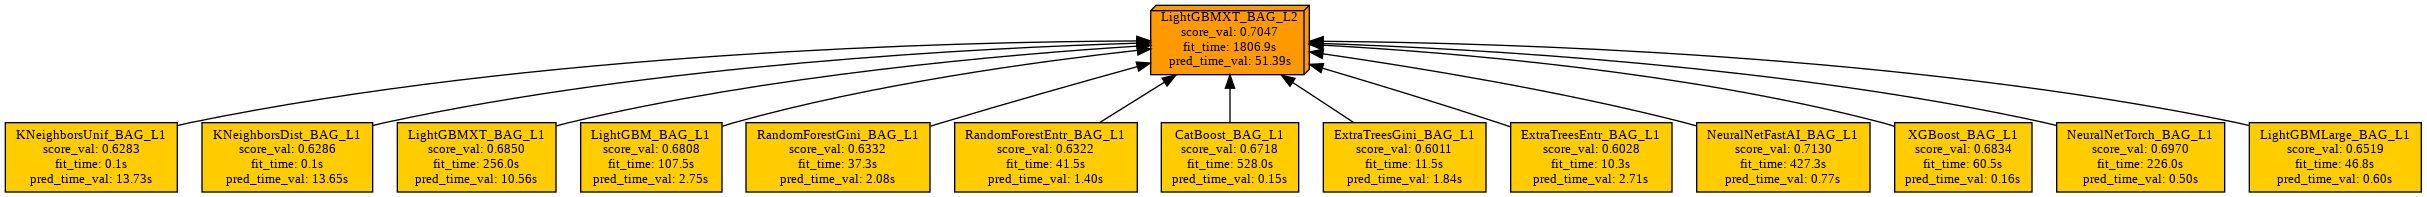

In [ ]:
path_to_png = predictor.plot_ensemble_model('LightGBMXT_BAG_L2')
from IPython.display import Image, display
display(Image(filename=path_to_png))

In [ ]:
# Extract feature importance from the AutoGluon predictor
feature_importance = predictor.feature_importance(test_data, model=best_model, time_limit=1000)

In [ ]:
feature_importance

,importance,stddev,p_value,n,p99_high,p99_low
unique_word_count,0.088443,NaN,NaN,1,NaN,NaN
punctuation_count,0.070966,NaN,NaN,1,NaN,NaN
stopword_count,0.070289,NaN,NaN,1,NaN,NaN
ttr,0.047385,NaN,NaN,1,NaN,NaN
uniqueness_bigram,0.037169,NaN,NaN,1,NaN,NaN
noun_count,0.033985,NaN,NaN,1,NaN,NaN
hapax_legomenon,0.029314,NaN,NaN,1,NaN,NaN
complex_sentence_count,0.026805,NaN,NaN,1,NaN,NaN
avg_word_length,0.024827,NaN,NaN,1,NaN,NaN
word_count,0.023823,NaN,NaN,1,NaN,NaN


In [ ]:
# select the top 10 features
top_10_features = feature_importance.head(10)

# convert index to list
top_10_features_list = top_10_features.index.tolist()

# print the top 10 features
print(top_10_features_list)

['pred_prob', 'punctuation_count', 'uniqueness_bigram', 'stopword_count', 'noun_count', 'complex_sentence_count', 'adv_count', 'unique_word_count', 'hapax_legomenon', 'person_entity_count']


In [ ]:
# new train_data with these features and label
new_train_data = train_data[top_10_features_list + ['label']]

# new test_data with these features and label
new_test_data = test_data[top_10_features_list + ['label']]

In [ ]:
feature_df = pd.DataFrame(feature_importance)
sorted_features = feature_df.sort_values(by='importance', ascending=False)

# extract the top 12 features from the df
top_12_features = sorted_features.head(12)

# print the top 12 features
print(top_12_features)

                        importance  stddev  p_value  n  p99_high  p99_low
unique_word_count         0.088443     NaN      NaN  1       NaN      NaN
punctuation_count         0.070966     NaN      NaN  1       NaN      NaN
stopword_count            0.070289     NaN      NaN  1       NaN      NaN
ttr                       0.047385     NaN      NaN  1       NaN      NaN
uniqueness_bigram         0.037169     NaN      NaN  1       NaN      NaN
noun_count                0.033985     NaN      NaN  1       NaN      NaN
hapax_legomenon           0.029314     NaN      NaN  1       NaN      NaN
complex_sentence_count    0.026805     NaN      NaN  1       NaN      NaN
avg_word_length           0.024827     NaN      NaN  1       NaN      NaN
word_count                0.023823     NaN      NaN  1       NaN      NaN
verb_count                0.022556     NaN      NaN  1       NaN      NaN
adv_count                 0.020187     NaN      NaN  1       NaN      NaN


In [ ]:
# replace _ with ' ' in  index values
top_12_features.index = top_12_features.index.str.replace('_', ' ')

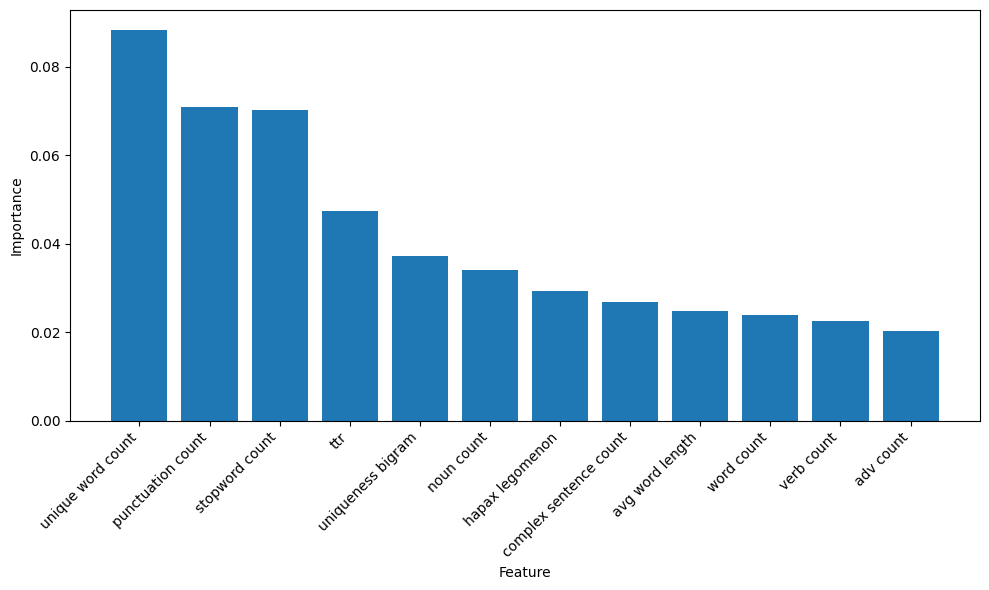

In [ ]:
# prompt: visualise the top 12 feature importance of the autogluon model

import matplotlib.pyplot as plt


# Prepare data for bar plot
data = {'Feature': top_12_features.index, 'Importance': top_12_features.importance}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(data['Feature'], data['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
